# Initial concentration flux #

Verifying that the concentration flux over the top boundary is initially diffusive. 

Chris Green, 2015 (chris.green@csiro.au)

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import erf
%matplotlib inline

Initially, the mass flux is purely diffusive, in which case the flux over the top boundary scales as $\sqrt(1/(\pi t))$ where $t$ is time.

In [45]:
tdata = np.linspace(1,100, 100)
cdata = np.sqrt(1/(np.pi * tdata))

## 2D case ##

Read in the data from the 2D test and plot it. For the 2D case, the width of the top boundary is 10 m.

In [46]:
moosedata2D = pd.read_csv('../../tests/2D/gold/2Dddc.csv', header = 0)
width = 10

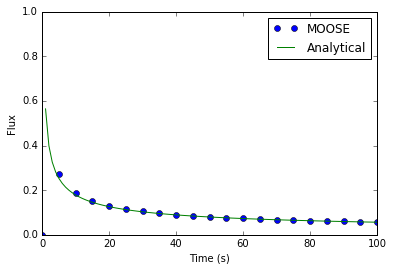

In [47]:
plt.plot(moosedata2D.time, -moosedata2D.boundaryfluxint / width, 'o', label = 'MOOSE', markevery=5)
plt.plot(tdata, cdata, label = 'Analytical')
plt.xlabel('Time (s)')
plt.ylabel('Flux')
plt.legend(loc = 'best')

## 3D case ##

Read in the data from the 3D test and plot it. For the 3D case, the cross-sectional area of the top boundary is 100 m$^2$.

In [14]:
moosedata3D = pd.read_csv('../../tests/3D/gold/3Dddc.csv', header = 0)
area = 100

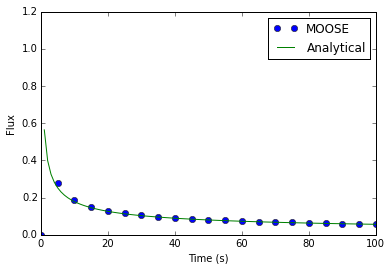

In [17]:
plt.plot(moosedata3D.time, -moosedata3D.boundaryfluxint / area, 'o', label = 'MOOSE', markevery=5)
plt.plot(tdata, cdata, label = 'Analytical')
plt.xlabel('Time (s)')
plt.ylabel('Flux')
plt.legend(loc = 'best')

# Initial random perturbation #

Check that the initial random perturbation initial condition is working properly. Initially, the concentration profile is diffusice, and is given by $1 + \mathrm{erf}(z/(2 t))$ for $z < 0$, where $\mathrm{erf}$ is the error function. 

## 2D ##

In [48]:
moosedata2D = pd.read_csv('../../tests/2D/gold/2Dddc_ic_conc_0000.csv', header = 0)

Plot the concentration in the middle row of this example (y = 0.5), corresponding to a $z$ value of -0.5 in the initial diffusive concentration profile. The diffusive concentration at this location is equal to $1 + \mathrm{erf}(0.25)$. The amplitude of the random perturbation in the test problem is 0.5 (so 0.25 above and below the inital diffusive concentration).

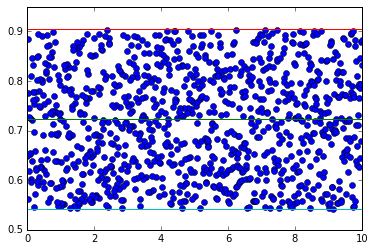

In [49]:
middlerow = moosedata2D[moosedata2D.y == 0.5]
# Plot the concentration along this line
plt.plot(middlerow.x, middlerow.concentration, 'o')
# Also plot the analytic concentration for t=1 and the values +- 25%
c1 = 1 + erf(-0.5/2)
c1p = c1 * 1.25
c1m = c1 * 0.75
plt.plot((0,10),(c1,c1))
plt.plot((0,10),(c1p,c1p))
plt.plot((0,10),(c1m,c1m))

In this case, we can see that the concentration at this *y* value is bounded by predicted values, which indicates that the perturbation initial condition is correctly pertubing the diffusive concentration by the specified amplitude.

In [52]:
c1

0.7236736098317631

## 3D ##

In [57]:
moosedata3D = pd.read_csv('../../tests/3D/gold/3Dddc_ic_conc_0000.csv', header = 0)

Plot the concentration in the middle row of this example (z = 0.5), corresponding to a $z$ value of -0.5 in the initial diffusive concentration profile. The diffusive concentration at this location is equal to $1 + \mathrm{erf}(0.25)$. The amplitude of the random perturbation in the test problem is 0.5 (so 0.25 above and below the inital diffusive concentration).

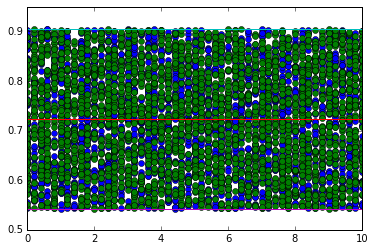

In [59]:
middlerow = moosedata3D[moosedata3D.z == 0.5]
# Plot the concentration along this line
plt.plot(middlerow.x, middlerow.concentration, 'o')
plt.plot(middlerow.y, middlerow.concentration, 'o')
# Also plot the analytic concentration for t=1 and the values +- 25%
c1 = 1 + erf(-0.5/2)
c1p = c1 * 1.25
c1m = c1 * 0.75
plt.plot((0,10),(c1,c1))
plt.plot((0,10),(c1p,c1p))
plt.plot((0,10),(c1m,c1m))